In [46]:
import pandas as pd 
import numpy as np
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from tqdm import tqdm
from tslearn.metrics import dtw

# Load model path into logic_ensemble object

In [ ]:
model_path = '/home/spankaew/Git/astrologics/models/toy_reprogramming_1/'
toy_model = le.LogicEnsemble(model_path, project_name = 'toy_reprogramming_1')
toy_model.create_simulation()

# Add random initial conditions
test = pd.read_csv(model_path + '/bn0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))

# Run simulation
toy_model.simulation.update_parameters(max_time = 10, sample_count = 3000)
toy_model.simulation.run_simulation(initial_state=test_dict)

# Save the simualtion_df
toy_model.simulation.simulation_df.to_csv('/home/spankaew/Git/astrologics/tmp/toy_reprogramming_randomsimulation.csv')

Simulation object created
Start simulation


100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

Simulation completed


In [9]:
model_path = '/home/spankaew/Git/astrologics/models/dev/synthetic_random_diff/'
srd = le.LogicEnsemble(model_path, project_name = 'synthetic_random_diff')
srd.create_simulation()

# Add random initial conditions
test = pd.read_csv(model_path + '/bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))

# Run simulation
srd.simulation.update_parameters(max_time = 10, sample_count = 5000)
srd.simulation.run_simulation(initial_state=test_dict)

# Save the simualtion_df
srd.simulation.simulation_df.to_csv('/home/spankaew/Git/astrologics/tmp/synthetic_random_diff_randomsimulation.csv')

Simulation object created
Start simulation


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [12:21<00:00,  1.35it/s]


Simulation completed


In [5]:
model_path = '/home/spankaew/Git/astrologics/models/test_bonesis/'
test_bonesis = le.LogicEnsemble(model_path, project_name = 'test_bonesis')
test_bonesis.create_simulation()

# Add random initial conditions
test = pd.read_csv(model_path + 'bn0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))

# Run simulation
test_bonesis.simulation.update_parameters(max_time = 20, sample_count = 5000)
test_bonesis.simulation.run_simulation(initial_state = test_dict)

# Save the simualtion_df
test_bonesis.simulation.simulation_df.to_csv('/home/spankaew/Git/astrologics/tmp/test_bonesis_randomsimulation.csv')

Simulation object created
Start simulation


100%|██████████| 88/88 [00:17<00:00,  5.04it/s]

Simulation completed


In [7]:
model_path = '/home/spankaew/Git/astrologics/models/herault_hematopoiesis/'
hh_model = le.LogicEnsemble(model_path, project_name = 'herault_hematopoiesis')
hh_model.create_simulation()

# Add random initial conditions
test = pd.read_csv(model_path + 'bn0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))

# Run simulation
hh_model.simulation.update_parameters(max_time = 30,thread_count = 15, sample_count = 5000)
hh_model.simulation.run_simulation(initial_state=test_dict)

# Save the simualtion_df
hh_model.simulation.simulation_df.to_csv('/home/spankaew/Git/astrologics/tmp/herault_hematopoiesis_randomsimulation.csv')

Simulation object created
Start simulation


100%|██████████| 616/616 [02:40<00:00,  3.85it/s]


Simulation completed


In [51]:
def calculate_endtimepoint_distancematrix(simulation_df):
    end_timepoint = simulation_df.timepoint.unique().max()
    simulation_df = simulation_df[simulation_df.timepoint == end_timepoint]

    # Make the model_id the index
    simulation_df = simulation_df.set_index('model_id')
    model_name = simulation_df.index
    simulation_df = simulation_df.drop(columns=['timepoint'])

    # Convert simulation_df to numpy.array
    simulation_array = simulation_df.to_numpy()

    # Create the distance matrix from the simulation
    distance_matrix = squareform(pdist(simulation_array, metric='euclidean'))
    distance_matrix = pd.DataFrame(distance_matrix, columns=model_name, index=model_name)

    return(distance_matrix)

def calculate_total_distancematrix(simulation_df):
    # Make the model_id the index
    simulation_df.model_id = simulation_df.model_id.astype('category')
    node_list = simulation_df.columns.drop(['timepoint','model_id'])
    model_name = simulation_df.model_id.unique()
    
    # Convert simulation_df to numpy.array
    model_original_all = {}
    for i in model_name:
        model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
        model_original_all[i] = np.array(model_original)
    pca_all_trajectory = np.array(list(model_original_all.values()))

    # Initialize an empty distance matrix
    num_trajectories = len(pca_all_trajectory)
    distance_matrix = np.zeros((num_trajectories, num_trajectories))

    # Calculate DTW distance for each pair of trajectories
    for i in tqdm(range(num_trajectories)):
        for j in range(num_trajectories):
            distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

    # Display the distance matrix
    distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)

    return(distance_matrix)

def plot_distance_matrix(distance_matrix):
    # Visualize clusters with MDS
    #distance_matrix = model.succession_diagram.distance_matrix
    mds = MDS(dissimilarity='precomputed', random_state=12345)
    coords = mds.fit_transform(distance_matrix)

    plt.figure(figsize=(6, 5))
    plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
    plt.title('Distance matrix visualized with MDS')
    plt.show()

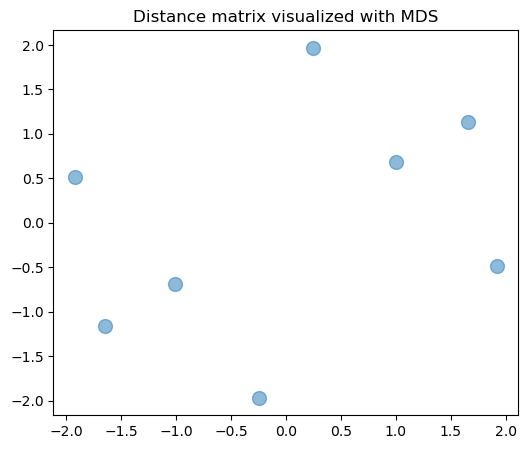

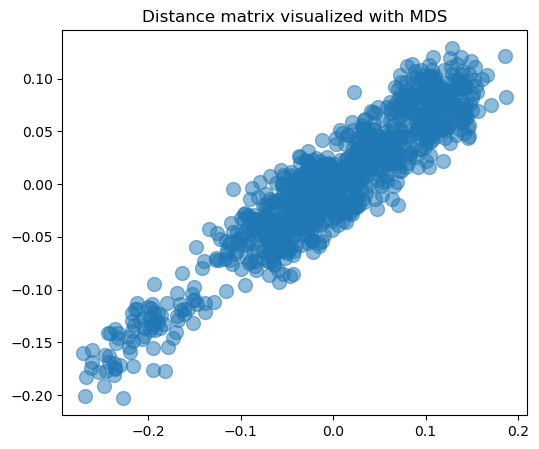

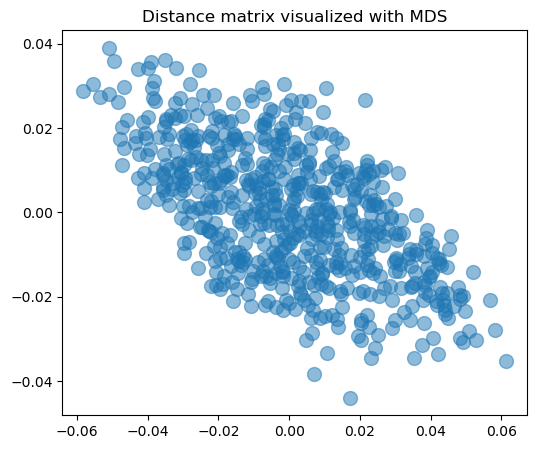

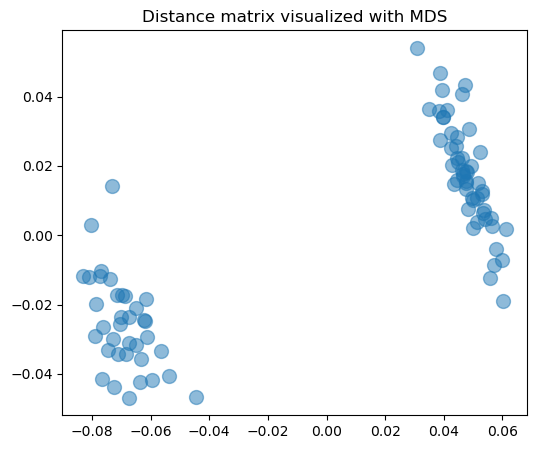

In [53]:
# Calculate the distance matrix for each simulation
toy_distance_matrix = calculate_endtimepoint_distancematrix(toy_model.simulation.simulation_df)
srd_distance_matrix = calculate_endtimepoint_distancematrix(srd.simulation.simulation_df)
hh_distance_matrix = calculate_endtimepoint_distancematrix(hh_model.simulation.simulation_df)
bonesis_distance_matrix = calculate_endtimepoint_distancematrix(test_bonesis.simulation.simulation_df)

# Plot the distance matrix
plot_distance_matrix(toy_distance_matrix)
plot_distance_matrix(srd_distance_matrix)
plot_distance_matrix(hh_distance_matrix)
plot_distance_matrix(bonesis_distance_matrix)

100%|██████████| 8/8 [00:00<00:00, 635.09it/s]


100%|██████████| 88/88 [00:00<00:00, 223.12it/s]


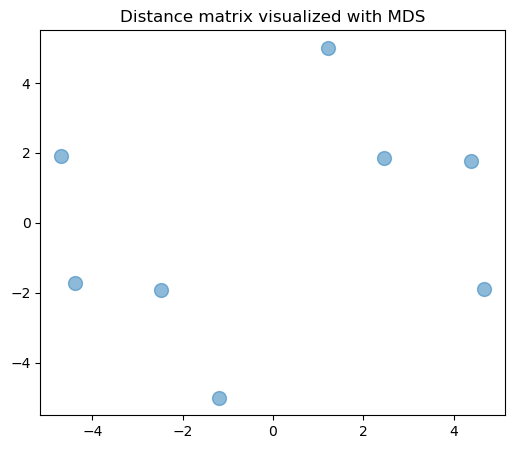

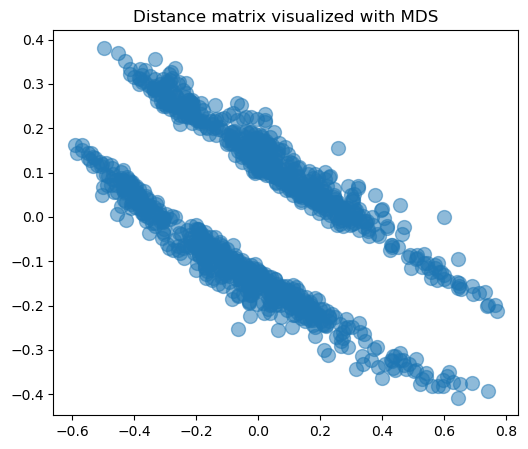

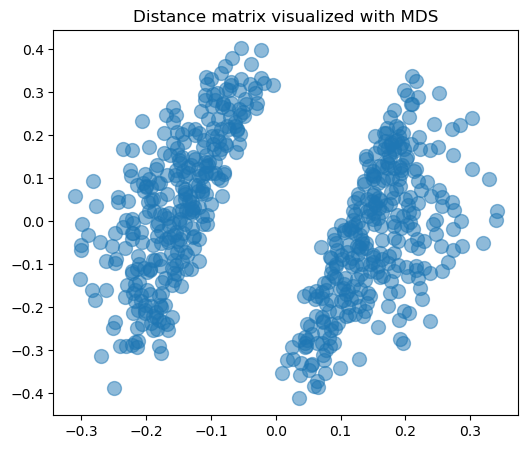

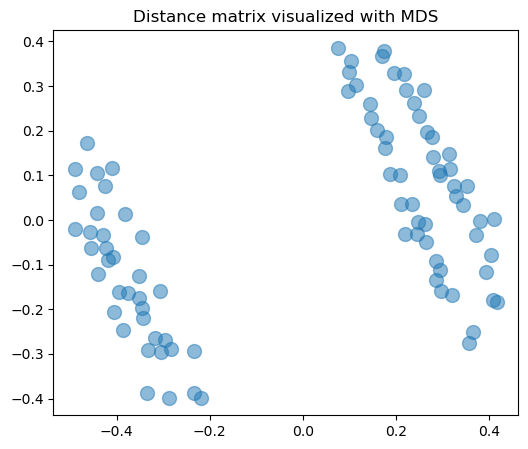

In [52]:
# Calculate the distance matrix for each simulation
toy_distance_matrix_all = calculate_total_distancematrix(toy_model.simulation.simulation_df)
srd_distance_matrix_all = calculate_total_distancematrix(srd.simulation.simulation_df)
hh_distance_matrix_all = calculate_total_distancematrix(hh_model.simulation.simulation_df)
bonesis_distance_matrix_all = calculate_total_distancematrix(test_bonesis.simulation.simulation_df)

# Plot the distance matrix
plot_distance_matrix(toy_distance_matrix_all)
plot_distance_matrix(srd_distance_matrix_all)
plot_distance_matrix(hh_distance_matrix_all)
plot_distance_matrix(bonesis_distance_matrix_all)